<a href="https://colab.research.google.com/github/ChacoGolden/DSML_EV/blob/main/EV_CO2_graphs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import requests

In [62]:
EV_share = pd.read_csv('https://raw.githubusercontent.com/ChacoGolden/DSML_EV/refs/heads/main/EV_share.csv')
EV_absolute = pd.read_csv('https://raw.githubusercontent.com/ChacoGolden/DSML_EV/refs/heads/main/EV_absolute.csv')
cars_number = pd.read_csv('https://raw.githubusercontent.com/ChacoGolden/DSML_EV/refs/heads/main/cars_number.csv')
CO2_emissions = pd.read_csv('https://raw.githubusercontent.com/ChacoGolden/DSML_EV/refs/heads/main/CO2_carb_comb.csv')

In [58]:
print(EV_share.head())
print(EV_absolute.head())
print(cars_number.head())

   date    ZH    BE    LU    UR    SZ    OW    NW    GL    ZG  ...    SG  \
0  2014  0.93  0.91  0.66  0.65  0.87  0.75  1.04  1.02  0.55  ...  0.62   
1  2015  3.49  1.49  1.70  0.80  2.30  1.25  1.61  1.18  2.88  ...  1.53   
2  2016  3.16  2.16  1.83  0.83  2.14  2.18  1.64  1.07  2.72  ...  1.75   
3  2017  4.24  2.56  2.11  1.53  2.86  3.30  1.99  1.29  3.42  ...  2.68   
4  2018  4.55  3.15  2.72  1.57  4.15  5.15  2.41  2.02  4.33  ...  3.38   

     GR    AG    TG    TI    VD    VS    NE    GE    JU  
0  1.48  0.45  0.66  0.87  0.84  0.78  0.31  1.03  1.04  
1  1.74  2.14  1.45  1.53  1.07  1.16  0.76  1.73  0.96  
2  2.39  2.09  1.80  1.69  1.39  1.38  1.09  2.12  1.14  
3  2.60  2.92  2.28  1.83  2.36  2.43  1.40  3.02  1.95  
4  3.16  3.26  3.64  2.37  2.52  2.24  1.60  3.58  2.16  

[5 rows x 27 columns]
   date    ZH   BE   LU  UR   SZ  OW  NW  GL   ZG  ...   GR   AG   TG   TI  \
0  2014   485  252   86   6   50  10  16  18   30  ...   97  107   54  162   
1  2015  1951  4

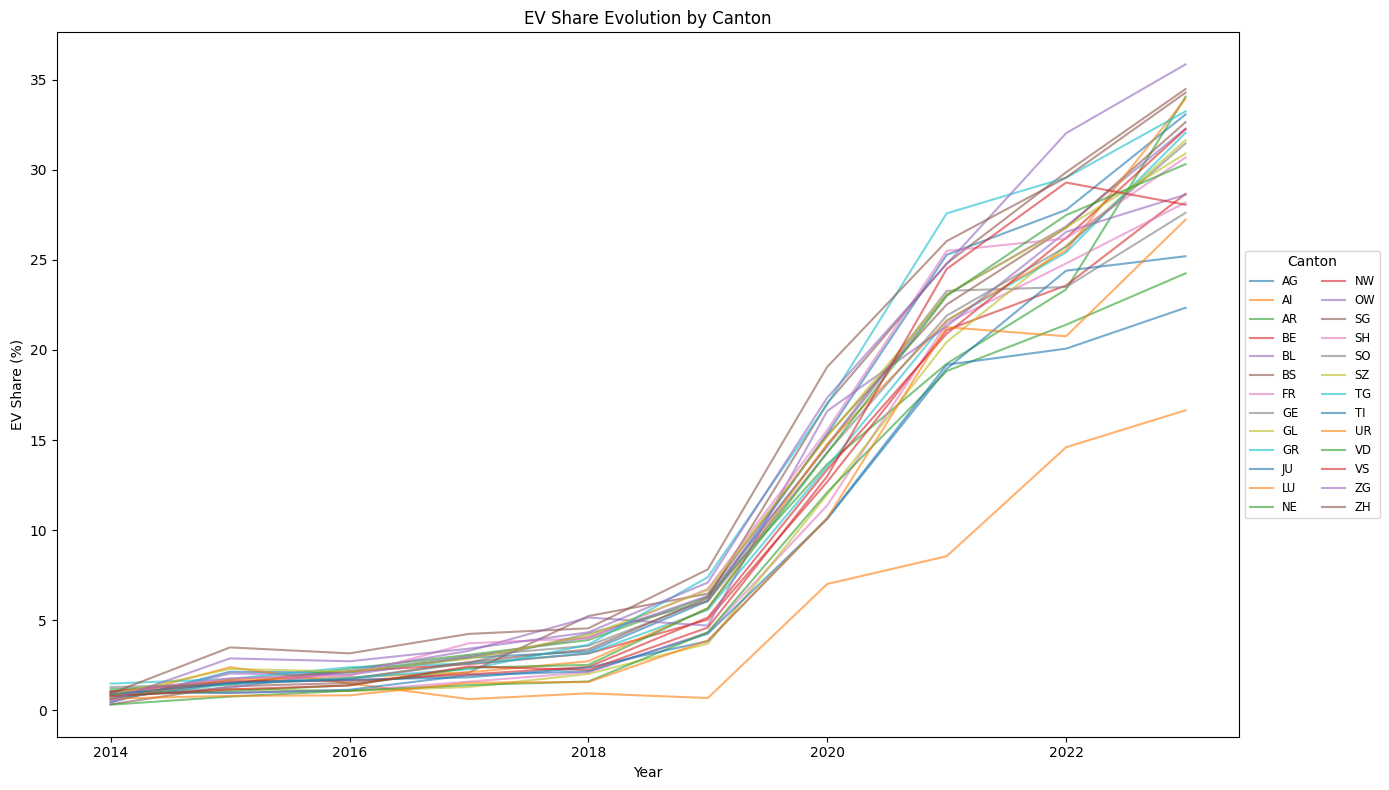

In [55]:
# Melt EV_share to long format for plotting
ev_share_long = EV_share.melt(id_vars='date', var_name='canton', value_name='EV_share')

plt.figure(figsize=(14, 8))
for canton in sorted(ev_share_long['canton'].unique()):
    canton_data = ev_share_long[ev_share_long['canton'] == canton]
    plt.plot(canton_data['date'], canton_data['EV_share'], label=canton, alpha=0.6)

plt.title('EV Share Evolution by Canton')
plt.xlabel('Year')
plt.ylabel('EV Share (%)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=2, fontsize='small', title="Canton")
plt.tight_layout()
plt.show()


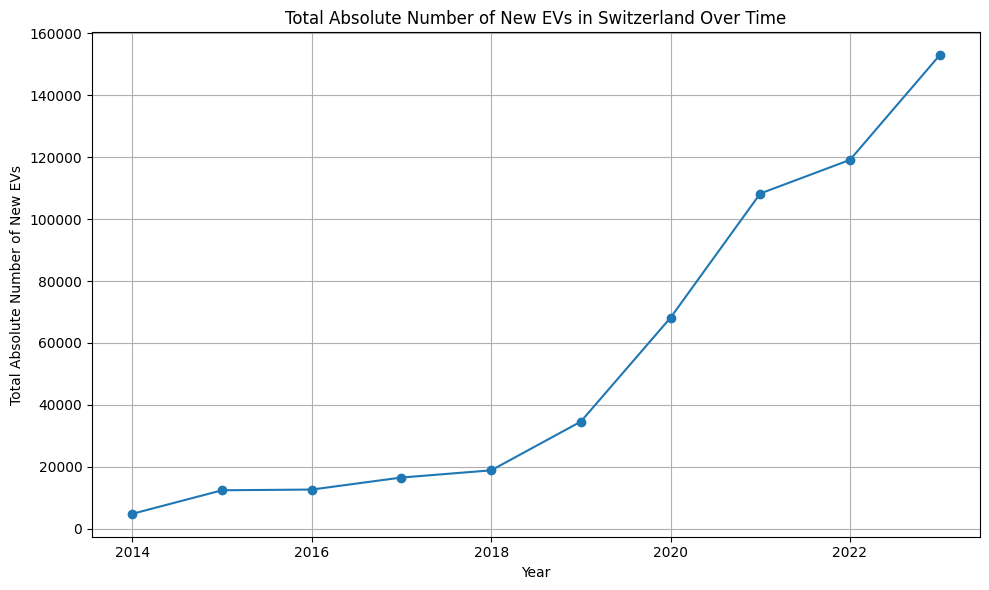

In [63]:
# Get the list of canton columns (exclude 'date')
canton_cols = [col for col in EV_absolute.columns if col != 'date']

# Compute the sum per year
EV_absolute['total_ev'] = EV_absolute[canton_cols].sum(axis=1)

plt.figure(figsize=(10, 6))
plt.plot(EV_absolute['date'], EV_absolute['total_ev'], marker='o')
plt.title('Total Absolute Number of New EVs in Switzerland Over Time')
plt.xlabel('Year')
plt.ylabel('Total Absolute Number of New EVs')
plt.grid(True)
plt.tight_layout()
plt.show()


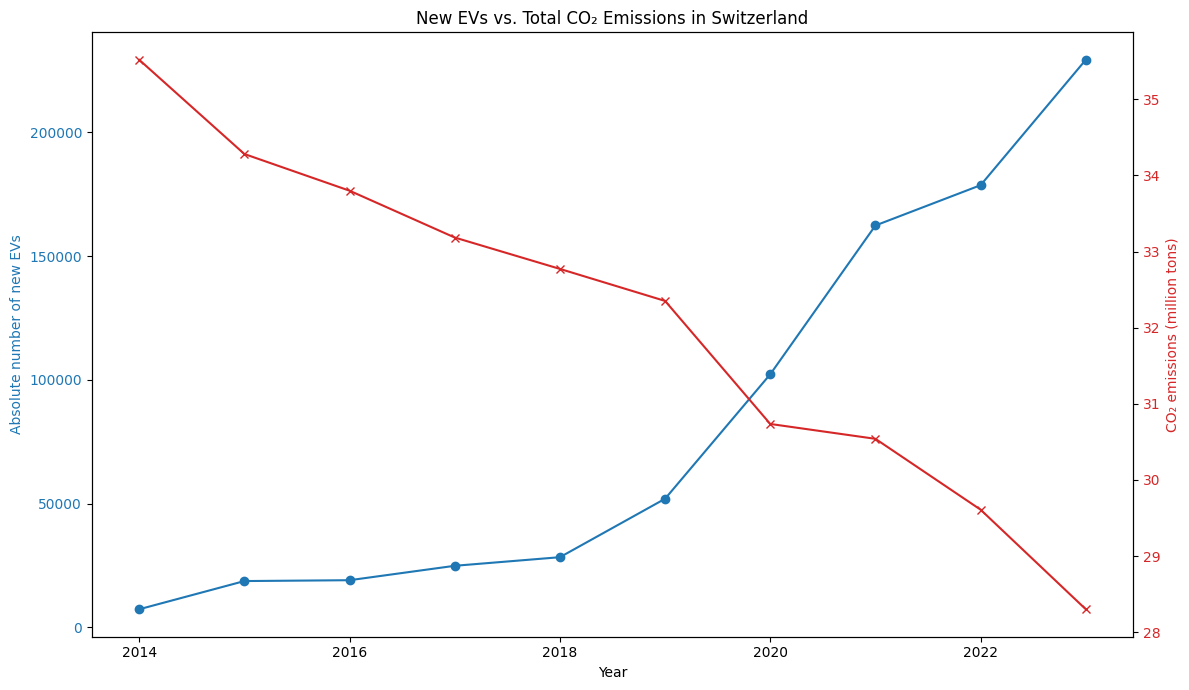

In [64]:
# Prepare EV absolute data
ev_years = EV_absolute['date'].astype(int)   # Ensure both are int for merge
ev_total = EV_absolute[[col for col in EV_absolute.columns if col != 'date']].sum(axis=1)

# Prepare CO2 emissions data
co2_years = CO2_emissions['Année'].astype(int)
co2_total = CO2_emissions['Emissions totale']

# Align years (intersection of years in both datasets)
years_common = sorted(set(ev_years) & set(co2_years))

ev_plot = ev_total[ev_years.isin(years_common)].reset_index(drop=True)
co2_plot = co2_total[co2_years.isin(years_common)].reset_index(drop=True)

# Plot
fig, ax1 = plt.subplots(figsize=(12, 7))

color1 = 'tab:blue'
ax1.set_xlabel('Year')
ax1.set_ylabel('Absolute number of new EVs', color=color1)
ax1.plot(years_common, ev_plot, color=color1, marker='o', label='EVs')
ax1.tick_params(axis='y', labelcolor=color1)

ax2 = ax1.twinx()
color2 = 'tab:red'
ax2.set_ylabel('CO₂ emissions (million tons)', color=color2)
ax2.plot(years_common, co2_plot, color=color2, marker='x', label='CO₂ emissions')
ax2.tick_params(axis='y', labelcolor=color2)

plt.title("New EVs vs. Total CO₂ Emissions in Switzerland")
fig.tight_layout()
plt.show()